In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("house_price_regression_dataset.csv")

In [3]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
df['Year_Built'].unique()

array([1981, 2016, 1977, 1993, 1990, 2012, 1972, 1997, 2006, 1982, 1973,
       1988, 1983, 2005, 1986, 1956, 2017, 2014, 1996, 1969, 1968, 1978,
       2009, 1967, 1984, 1992, 1960, 1998, 1987, 2013, 2018, 1957, 1980,
       1953, 1999, 1979, 2008, 1994, 1975, 1976, 1995, 2000, 1955, 1964,
       1991, 2022, 1966, 1971, 1962, 2002, 1952, 1970, 1950, 1954, 1985,
       2003, 1961, 2019, 2001, 2004, 2011, 2021, 2010, 1959, 2015, 2020,
       1974, 1958, 1963, 1965, 1989, 2007, 1951], dtype=int64)

In [6]:
df['Year_Built'].max()

2022

In [7]:
df['Year_Built'].min()

1950

In [8]:
df['Year_Built'].median()

1986.0

In [9]:
def categorize_by_year(year):
    if year < 1980:
        return 'Old'
    elif 1980 <= year <= 2010:
        return 'Standard'
    else: 
        return 'New'

df['Year_Built'] = df['Year_Built'].apply(categorize_by_year)

In [10]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,Standard,0.599637,0,5,2.623829e+05
1,4272,3,3,New,4.753014,1,6,9.852609e+05
2,3592,1,2,New,3.634823,0,9,7.779774e+05
3,966,1,2,Old,2.730667,1,8,2.296989e+05
4,4926,2,1,Standard,4.699073,0,8,1.041741e+06


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Year_Built'] = encoder.fit_transform(df['Year_Built'])

In [12]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,2,0.599637,0,5,2.623829e+05
1,4272,3,3,0,4.753014,1,6,9.852609e+05
2,3592,1,2,0,3.634823,0,9,7.779774e+05
3,966,1,2,1,2.730667,1,8,2.296989e+05
4,4926,2,1,2,4.699073,0,8,1.041741e+06


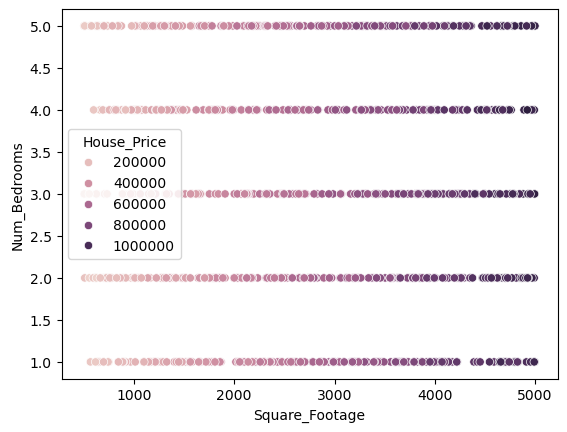

In [83]:
sns.scatterplot(x = df['Square_Footage'], y = df['Num_Bedrooms'], hue = df['House_Price'])
plt.show()

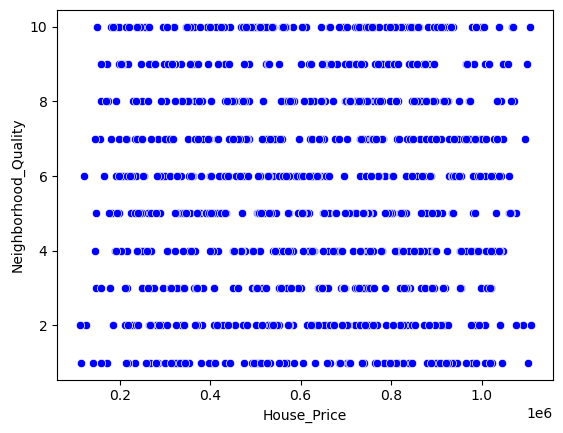

In [111]:
sns.scatterplot(x = df['House_Price'], y = df['Neighborhood_Quality'], color='blue')
plt.show()

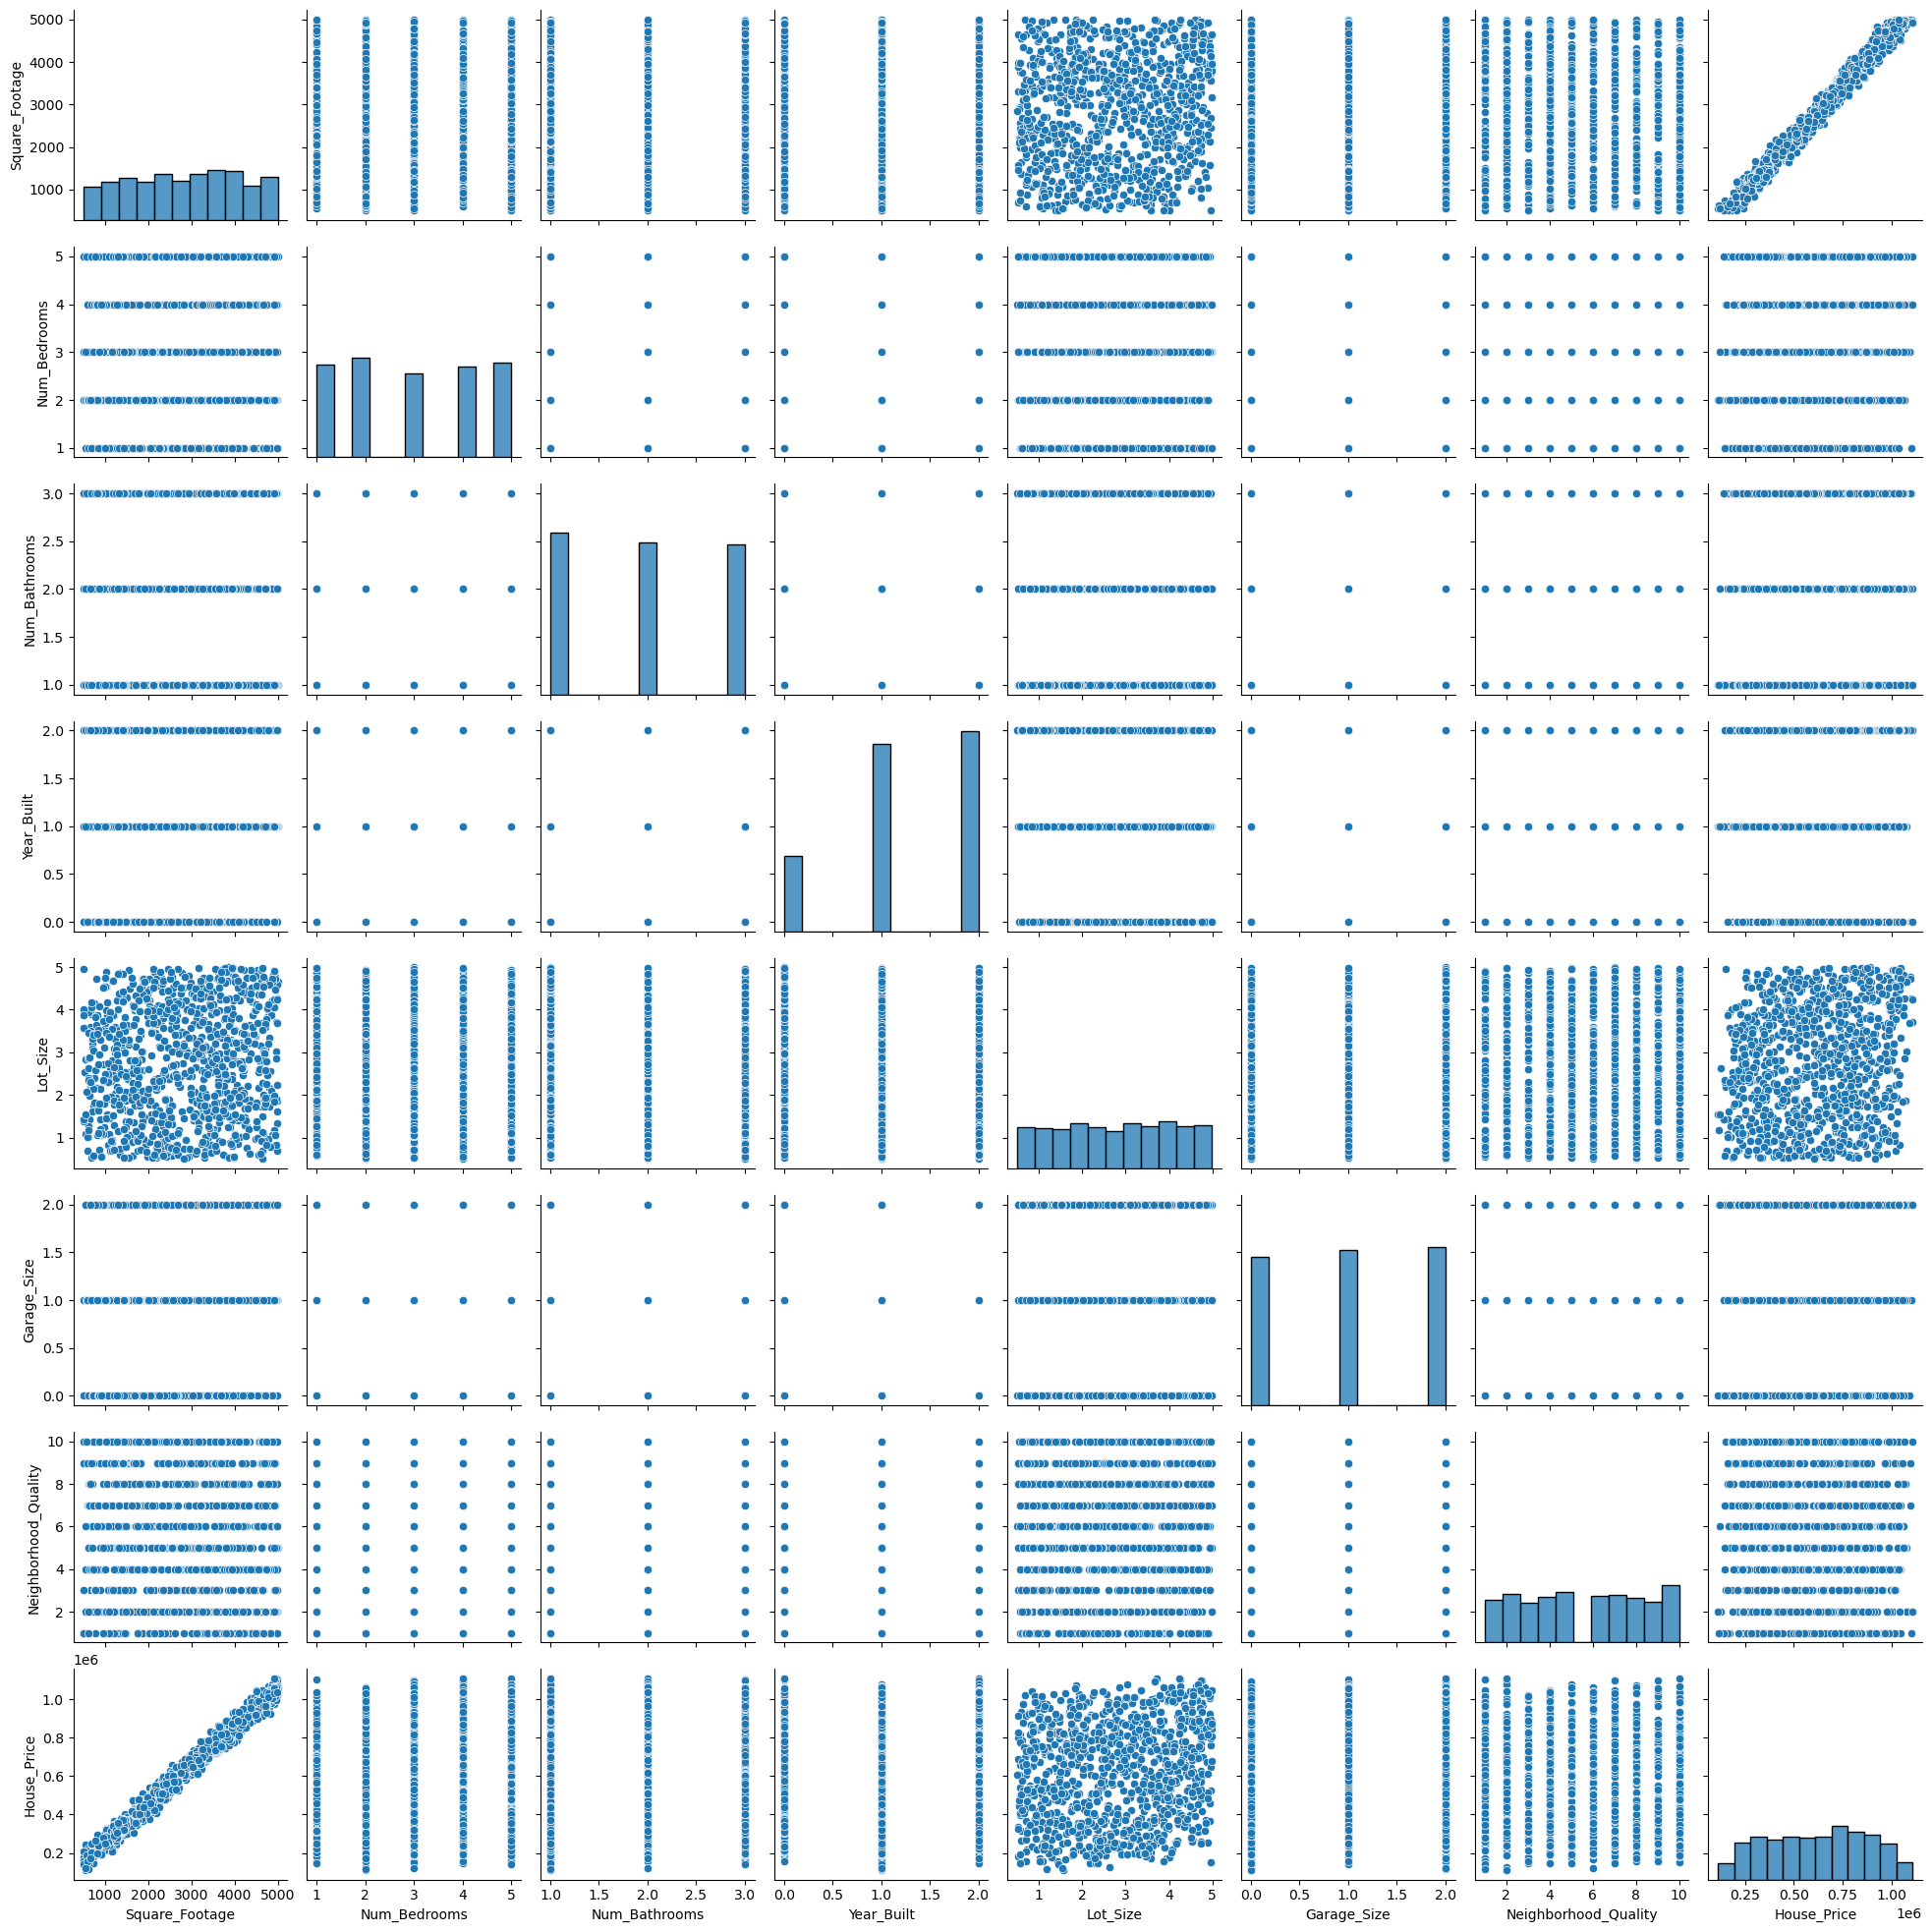

In [113]:
sns.pairplot(data=df)
plt.show()

# With Decision Tree Regressor

In [13]:
X = df.drop("House_Price",axis=1)
y = df['House_Price']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)
y_pred = tree_regressor.predict(X_test)
print("R2 Score:", r2_score(np.array(y_test), y_pred))
print("Mean Absolute Error:", mean_absolute_error(np.array(y_test), y_pred))
print("Mean Squared Error:", mean_squared_error(np.array(y_test), y_pred))

R2 Score: 0.978315406242564
Mean Absolute Error: 28831.80978015435
Mean Squared Error: 1305111531.1225352


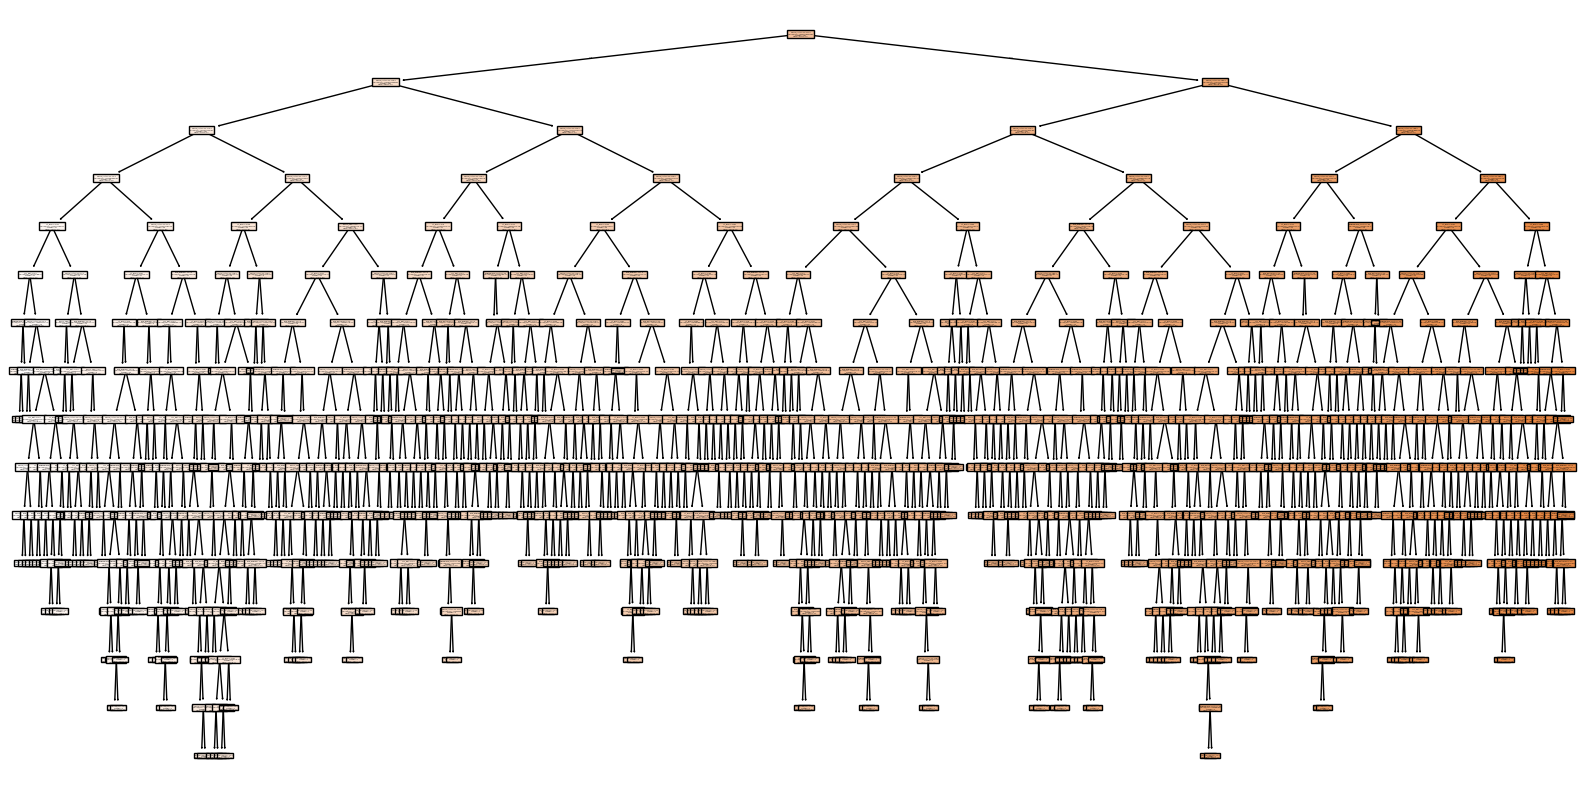

In [18]:
from sklearn import tree

column_names = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price']

plt.figure(figsize=(20,10))
tree.plot_tree(tree_regressor, feature_names=column_names, filled=True)
plt.show()

In [19]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)
y_pred = tree_regressor.predict(X_test)
print("R2 Score:", r2_score(np.array(y_test), y_pred))
print("Mean Absolute Error:", mean_absolute_error(np.array(y_test), y_pred))
print("Mean Squared Error:", mean_squared_error(np.array(y_test), y_pred))

R2 Score: 0.9776043322824086
Mean Absolute Error: 29221.83458735843
Mean Squared Error: 1347908312.8036022


# Hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {
    'criterion' : ['squared_error','friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best','random'],
    'max_depth' : [3,5,7,15,20,None],
    'min_samples_leaf' : [1,5,8],
}

In [22]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, n_jobs=-1, cv=5, scoring='r2')

In [23]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 7, 15, 20, None],
                         'min_samples_leaf': [1, 5, 8],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [24]:
y_pred = grid.predict(X_test)
print("R2 Score:", r2_score(np.array(y_test), y_pred))
print("Mean Absolute Error:", mean_absolute_error(np.array(y_test), y_pred))
print("Mean Squared Error:", mean_squared_error(np.array(y_test), y_pred))

R2 Score: 0.9799713133643648
Mean Absolute Error: 27493.7945824655
Mean Squared Error: 1205448908.7416518


In [25]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [26]:
grid.best_score_

0.9818998004057704

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

R2 Score: 0.9915833749654256
Mean Absolute Error: 19201.116846418732
Mean Squared Error: 506563992.32707757


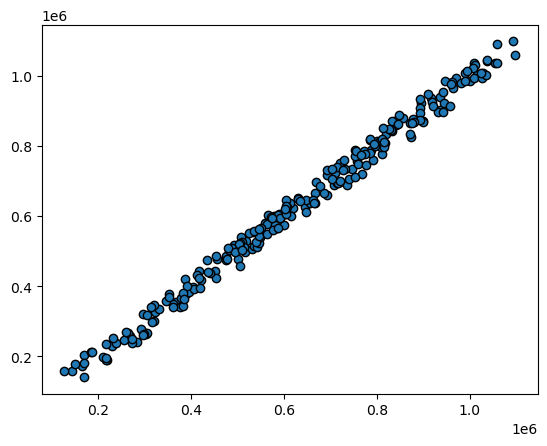

In [135]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(np.array(y_test), y_pred))
print("Mean Absolute Error:", mean_absolute_error(np.array(y_test), y_pred))
print("Mean Squared Error:", mean_squared_error(np.array(y_test), y_pred))
plt.scatter(y_pred,y_test,marker = 'o',edgecolors='k')
plt.show()

In [79]:
model.coef_

array([  199.38225451, 10478.66159414,  8187.52387765, -2695.28187964,
       13949.46066022,  4651.7682439 ,    47.69745555])

In [81]:
model.intercept_

-30557.08709432208

# SVM

In [31]:
#SVM - Regressor

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.svm import SVR

R2 Score: 0.00022520861268215953
Mean Absolute Error: 206498.06591733286
Mean Squared Error: 60172564142.12369


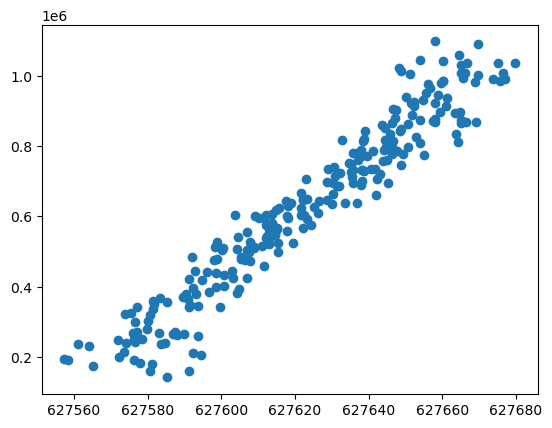

In [34]:
svr = SVR()
svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.scatter(y_pred,y_test)
plt.show()

In [36]:
params = {
    'kernel' : ['rbf','poly', 'linear','sigmoid'],
    'degree' : [2,3,5],
    'gamma' : ['scale','auto'],
    'C' : [100, 10, 1, 0.1, 0.01]
}

In [37]:
grid = GridSearchCV(estimator=SVR(),param_grid=params,cv=5,n_jobs=-1)

In [38]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

R2 Score: 0.4451922835166129
Mean Absolute Error: 153302.12333483752
Mean Squared Error: 33391723010.255993


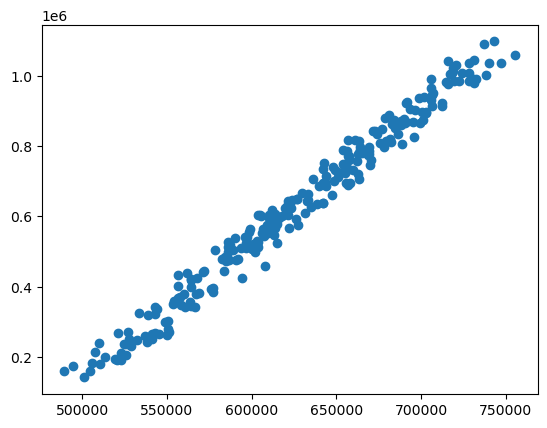

In [77]:
y_pred = grid.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.scatter(y_pred,y_test)
plt.show()